### 4.10 O caixeiro que prefere cidades ímpares


#### Objetivo: 
Encontre o caminho de menor distância no problema do caixeiro viajante
que prefere cidades ímpares e mostre ele de forma gráfica.
Considerações do experimento: Considere um número n ≥ 7 de coordenadas
(x, y) de cidades (cada cidade ocupa uma posição (x, y) diferente). Você pode gerar as
coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O
caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina
seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade
mais de uma vez. Além disso, atribua um número inteiro para cada uma das n cidades que
o caixeiro irá visitar, iniciando a contagem pelo número zero e aumentando esse número
de 1 em 1. O caixeiro deverá necessariamente visitar primeiro as cidades com números
ímpares antes das cidades com números pares. A cidade de número zero deve ser a cidade
inicial.

#### Estratégia de Resolução:


Primeiramente, irei importar a função `cria_cidades` e a função `plota_cidades`, para criar e visualizar as cidades, respectivamente.

In [1]:
from funcoes_5 import plota_cidades, cria_cidades

NUM_CIDADES = 10

CIDADES = cria_cidades(NUM_CIDADES)


CIDADES

{'Cidade 00': (258, 17),
 'Cidade 01': (227, 80),
 'Cidade 02': (22, 229),
 'Cidade 03': (143, 286),
 'Cidade 04': (292, 134),
 'Cidade 05': (191, 258),
 'Cidade 06': (250, 256),
 'Cidade 07': (288, 24),
 'Cidade 08': (122, 33),
 'Cidade 09': (276, 223)}

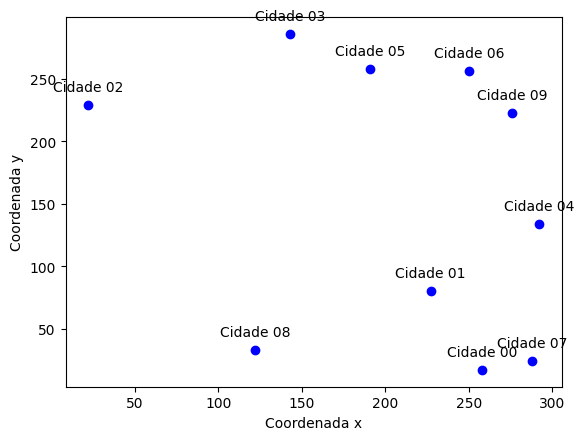

In [2]:
plota_cidades(CIDADES)

In [3]:
from pprint import pprint
from functools import partial
from itertools import permutations


from funcoes_5 import populacao_caixeiro as cria_populacao
from funcoes_5 import funcao_objetivo_pop_caixeiro
from funcoes_5 import funcao_objetivo_caixeiro
from funcoes_5 import selecao_torneio_min as funcao_selecao
from funcoes_5 import cruzamento_ordenado_com_preferencia as funcao_cruzamento
from funcoes_5 import mutacao_troca_com_preferencia as funcao_mutacao



In [4]:
TAMANHO_POPULACAO = 100
NUM_GERACOES = 5000
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 3

In [5]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
pprint(populacao)


[['Cidade 03',
  'Cidade 05',
  'Cidade 01',
  'Cidade 09',
  'Cidade 07',
  'Cidade 00',
  'Cidade 04',
  'Cidade 06',
  'Cidade 08',
  'Cidade 02'],
 ['Cidade 07',
  'Cidade 05',
  'Cidade 09',
  'Cidade 01',
  'Cidade 03',
  'Cidade 08',
  'Cidade 04',
  'Cidade 06',
  'Cidade 02',
  'Cidade 00'],
 ['Cidade 09',
  'Cidade 01',
  'Cidade 05',
  'Cidade 07',
  'Cidade 03',
  'Cidade 02',
  'Cidade 00',
  'Cidade 04',
  'Cidade 08',
  'Cidade 06'],
 ['Cidade 01',
  'Cidade 03',
  'Cidade 05',
  'Cidade 07',
  'Cidade 09',
  'Cidade 00',
  'Cidade 08',
  'Cidade 02',
  'Cidade 04',
  'Cidade 06'],
 ['Cidade 01',
  'Cidade 05',
  'Cidade 03',
  'Cidade 07',
  'Cidade 09',
  'Cidade 04',
  'Cidade 06',
  'Cidade 08',
  'Cidade 00',
  'Cidade 02'],
 ['Cidade 03',
  'Cidade 07',
  'Cidade 09',
  'Cidade 05',
  'Cidade 01',
  'Cidade 02',
  'Cidade 04',
  'Cidade 00',
  'Cidade 08',
  'Cidade 06'],
 ['Cidade 03',
  'Cidade 05',
  'Cidade 01',
  'Cidade 09',
  'Cidade 07',
  'Cidade 08',
  'C

In [6]:
funcao_objetivo = partial(funcao_objetivo_pop_caixeiro, cidades=CIDADES)


In [7]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao


Melhor individuo obtido por algoritmos genéticos:
['Cidade 03', 'Cidade 05', 'Cidade 09', 'Cidade 01', 'Cidade 07', 'Cidade 00', 'Cidade 08', 'Cidade 04', 'Cidade 06', 'Cidade 02'] com distância: 1239.3200922219264



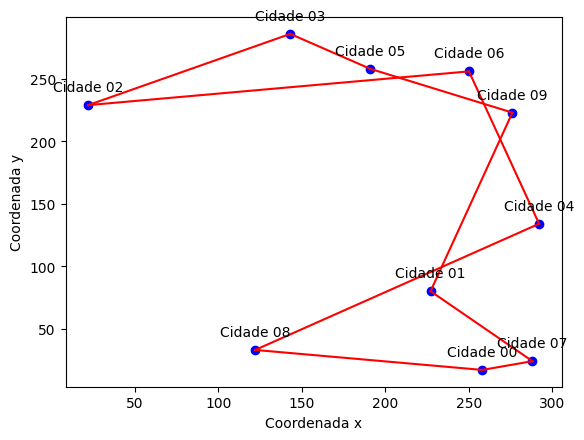

In [8]:
from funcoes_5 import plota_trajeto

fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiro(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto(CIDADES, melhor_individuo_observado)